In [37]:
import pandas as pd
import json
import seaborn as sns


with open('deploc.json', 'r') as file:
    dep_loc = json.load(file)
deploc = dep_loc['deploc']

df = pd.read_csv('cleanData.csv')

In [59]:
def price_to_clases(price):
        if price <= 100000:
            return 'Menor o igual 100.000'
        if price > 100000 and price <= 200000:
            return 'Entre 100.000 y 200.000'
        elif price > 200000 and price <= 300000:
            return 'Entre 200.000 y 300.000'
        elif price > 300000:
            return 'Mayor a 300.000'

def int_to_deploc(value):
     return deploc[int(value)]

df2 = df.copy()
df3 = df.copy()

df2['price'] = df2['price'].apply(price_to_clases)
df2['department_location'] = df2['department_location'].apply(int_to_deploc)

df3['department_location'] = df3['department_location'].apply(int_to_deploc)


In [60]:
df2['department_location'].value_counts()

montevideopocitos          3378
montevideocordon           3288
montevideocentro           2641
montevideomalvin           2322
montevideopuntacarretas    2158
                           ... 
saltosalto                    1
canelonesparquedelplata       1
caneloneslomasdesolymar       1
caneloneslagomar              1
coloniarosario                1
Name: department_location, Length: 80, dtype: int64

Se puede notar que las localizaciones con más datos es montevideopocitos, usaremos esta para el análisis por zona.

<Axes: xlabel='area', ylabel='price'>

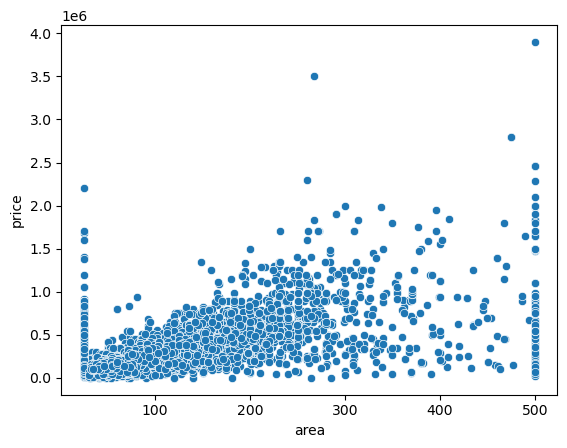

In [61]:
sns.scatterplot(data=df, x='area', y='price')

Se puede ver que hay una relación de dependencia entre metros y precio, como era de esperarse pero no es directamente proporcional. Es coherente ya que es solo uno de varios parámetros que fijan el precio de una propiedad.

<Axes: xlabel='area', ylabel='price'>

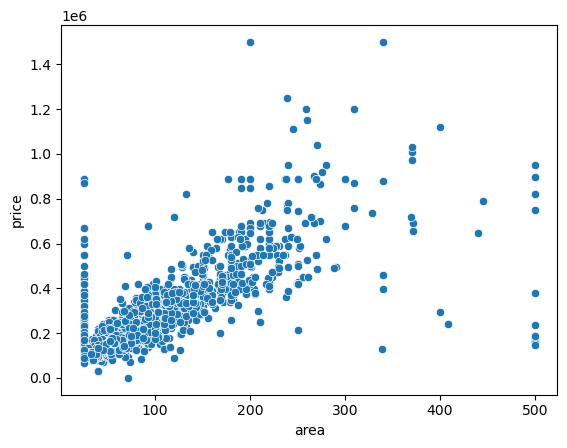

In [62]:
def filter_by_department(df, location):
    filtered_df = df[df['department_location'] == location]
    return filtered_df

sns.scatterplot(data=filter_by_department(df, montevideopocitos), x='area', y='price')

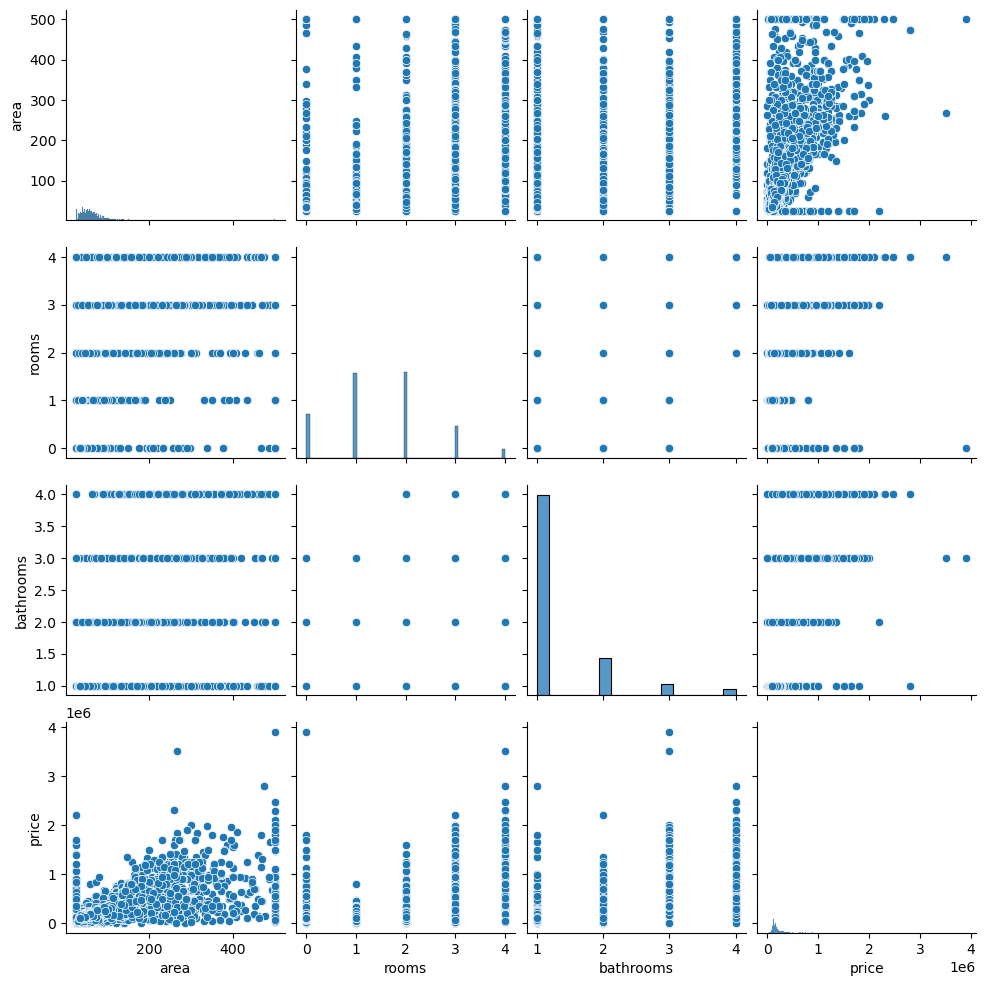

In [63]:
sns.pairplot(data=df3, vars=['area', 'rooms', 'bathrooms', 'price'])